In [2]:
import pandas as pd
import matplotlib
import psycopg2


In [51]:
host="localhost"
port=5432
dbname="hmvl"
username="dirmed"
#pwd="motdepasse"

In [50]:

# l'import est rapide pour une journée, en tout cas de 3M de lignes (40 secondes)
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select * from hmvl;"
hmvl = pd.read_sql_query(sql, conn)
conn = None

In [4]:
hmvl["hdt"] = pd.to_datetime(hmvl["hdt"],utc=True)

In [6]:
hmvl.dtypes

id                           int64
horodate_id                 object
hdt            datetime64[ns, UTC]
station                     object
status                      object
voie                        object
vitesse                    float64
longueur                   float64
statuttr                    object
dtype: object

In [57]:
print(hmvl["statuttr"].value_counts())
# a priori on garde les statuts B et @
# pour H que fait-on ? en principe c'est une erreur interne mais les valeurs ont l'air correctes
# de même pour J... et les autres valeurs ne sont pas documentées
# par exemple avec le statuttr J il n'y a aucune ligne avec le status 2
print(hmvl[(hmvl["status"]=="2") & (hmvl["statuttr"]=="J")])
# -> a priori le Status TR n'apporte pas d'info permettant d'éliminer des mesures
hmvl[hmvl["statuttr"]=="H"][:20]


B    1508493
@     924888
H     247139
J     190421
b        567
I         28
           6
Name: statuttr, dtype: int64
Empty DataFrame
Columns: [id, horodate_id, hdt, station, status, voie, vitesse, longueur, statuttr]
Index: []


,id,horodate_id,hdt,station,status,voie,vitesse,longueur,statuttr
47,48,Wed Apr 1 15:47:42 2020,2020-04-01 15:47:42+02:00,M1c,0,None,NaN,NaN,H
51,52,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:12.680000+02:00,M1b,0,0,91.0,3.9,H
52,53,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:14.320000+02:00,M1b,0,0,89.0,4.0,H
53,54,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:15.870000+02:00,M1b,0,0,93.0,4.3,H
54,55,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:16.040000+02:00,M1b,0,1,91.0,3.3,H
55,56,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:17.040000+02:00,M1b,0,1,86.0,4.3,H
56,57,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:17.970000+02:00,M1b,0,1,93.0,4.5,H
102,103,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:13.690000+02:00,M7O,0,0,123.0,0.7,H
103,104,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:13.890000+02:00,M7O,0,1,120.0,3.3,H
104,105,Wed Apr 1 15:47:42 2020,2020-04-01 15:48:17.180000+02:00,M7O,0,1,111.0,5.2,H


In [8]:
hmvl["status"].value_counts()

0    2871542
2     529113
Name: status, dtype: int64

In [31]:
print(hmvl[hmvl["status"]=="2"]["longueur"].value_counts())
# n'affiche rien:
# c'est rassurant, quand le status est 2, il n'y a pasde mesures de vitesse ni de longueur
# on peut donc garder les stats de status 2 par station des diagnostics, 
# et on peut les enlever pour les traitements ultérieurs
x=hmvl[hmvl["status"]=="2"]["station"].value_counts()[0:15]
print(x)
print(hmvl["station"].value_counts()[x.keys()])
# on voit que certaines stations M3S, M8Q... n'ont aucune mesure

Series([], Name: longueur, dtype: int64)
M3S     13483
M8Q     13483
M5r     13483
M7p     13483
M3e     13461
M1e     13269
M1E     13269
M4e     13245
M3m     13245
M7q     13203
M4i     13203
M7Q     13203
M3q     13203
M5y     13160
M4f      6626
Name: station, dtype: int64
M3S     13483
M8Q     13483
M5r     13483
M7p     13483
M3e     13483
M1e     13269
M1E     13269
M4e     15778
M3m     16769
M7q     13621
M4i     13401
M7Q     13643
M3q     13841
M5y     13160
M4f     23668
Name: station, dtype: int64


In [12]:
hmvl["hdt"].min() , hmvl["hdt"].max(), hmvl["hdt"].max()-hmvl["hdt"].min()
# des dates bizarres apparaissent, ni le 1er ni le 2 avril 2020!
# a priori on ne doit garder que le mesures de la date du jour, éventuellement les dates autour à cause de minuit

(Timestamp('2019-06-28 08:50:18+0000', tz='UTC'),
 Timestamp('2020-04-02 15:01:59.730000+0000', tz='UTC'),
 Timedelta('279 days 06:11:41.730000'))

In [17]:
hmvl["hdt"].dt.date.value_counts()

2020-04-02    2957771
2020-04-01     293162
2020-02-21      84199
2019-06-28      36344
2020-01-14      22403
2019-12-26       6776
Name: hdt, dtype: int64

In [45]:
listedates=hmvl["horodate_id"].str[:10]
listedates.value_counts()

Thu Apr  2    2957771
Wed Apr  1     293162
Fri Feb 21      84199
Fri Jun 28      36344
Tue Jan 14      22403
Thu Dec 26       6776
Name: horodate_id, dtype: int64

In [48]:
hmvl[hmvl["horodate_id"].str[10]==" Fri Jun 28"]

,id,horodate_id,hdt,station,status,voie,vitesse,longueur,statuttr


In [66]:
hmvl2=hmvl[hmvl["status"]=="0"][["hdt","station","voie","vitesse","longueur"]]

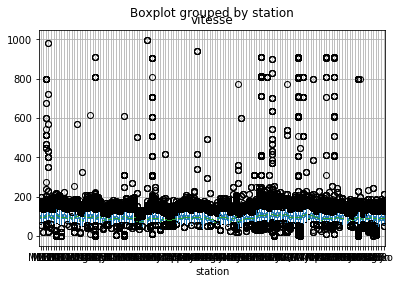

In [73]:
hmvl2.boxplot(column=["vitesse"],by="station")
# ça semble raisonnable de prendre 280 comme valeur seuil de vitesse

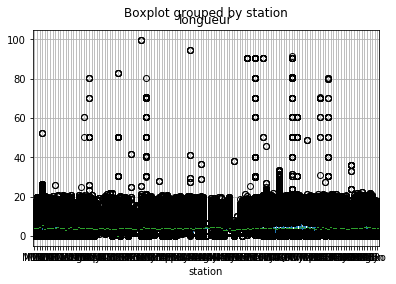

In [72]:
hmvl2.boxplot(column=["longueur"],by="station")
# ça semble raisonnable de prendre 25 comme valeur seuil de longueur, 
# mais il y a peut être valeur plus pertinente pour le métier, à cause des Transports Exceptionnels par exemple?
# ou pour voir passer les convois ITER s'ils empruntent le réseau DIRMED?